# Regressão 01 - tarefa 03 - transformações em X e Y

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [35]:
df = sns.load_dataset('tips')
df['tip_pct'] = df['tip'] / (df['total_bill'] - df['tip'])
df['net_bill'] = df['total_bill'] - df['tip']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [37]:
# 1)

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', df)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [39]:
# 2)

reg = smf.ols('tip ~ net_bill', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           5.02e-23
Time:                        16:10:14   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

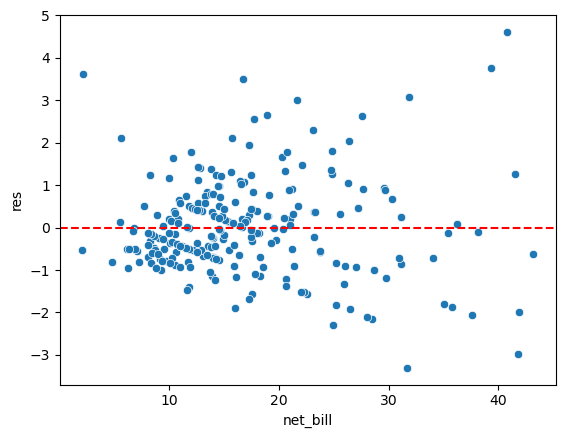

In [41]:
# 3)

df['res'] = reg.resid

sns.scatterplot(y='res', x='net_bill', data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [43]:
# 4)

reg = smf.ols('tip ~ np.log(net_bill)', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           4.40e-20
Time:                        16:10:23   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
reg = smf.ols('tip ~ net_bill + np.power(net_bill,2)', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           4.96e-22
Time:                        16:10:26   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1 - Conclusão

O modelo do qual foi tirado o polinomio de segundo grau sedempenhou melhor do que foi tirado o logaritimo

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [49]:
# 1)

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', df)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [51]:
# 2)

reg = smf.ols('np.log(tip) ~ net_bill', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           2.60e-21
Time:                        16:10:35   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

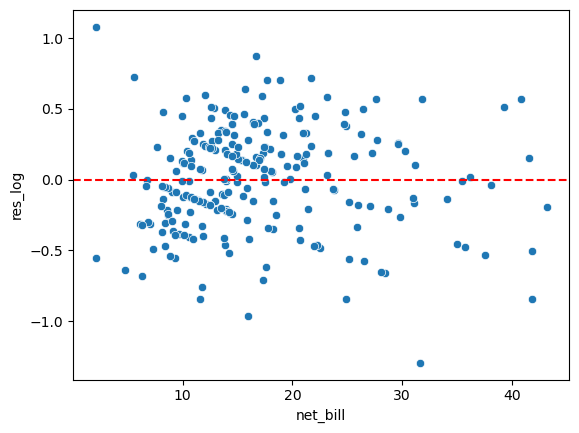

In [53]:
# 3)

df['res_log'] = reg.resid

sns.scatterplot(y='res_log', x='net_bill', data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [70]:
# 4)

reg = smf.ols('np.log(tip) ~ np.log(net_bill)', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           5.62e-22
Time:                        14:59:19   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
reg = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill,2)', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           2.82e-22
Time:                        14:59:46   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
df['pred_y'] = np.exp(reg.fittedvalues)
r = df[['pred_y', 'tip']].corr()
r2 = r.iloc[0,1]**2
r2

0.32908491114682004

### 2 - Conclusão

Concluindo o segundo estudo, temos um modelo 32,9% explicativo. Ainda um pouco abaixo do melhor modelo do primeiro exemplo que finalizou com 33,4%.  
São dois modelos uteis para um estudo de regressão.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [5]:
prev_renda = pd.read_csv('previsao_de_renda.csv')
prev_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


<Axes: xlabel='tempo_emprego', ylabel='renda'>

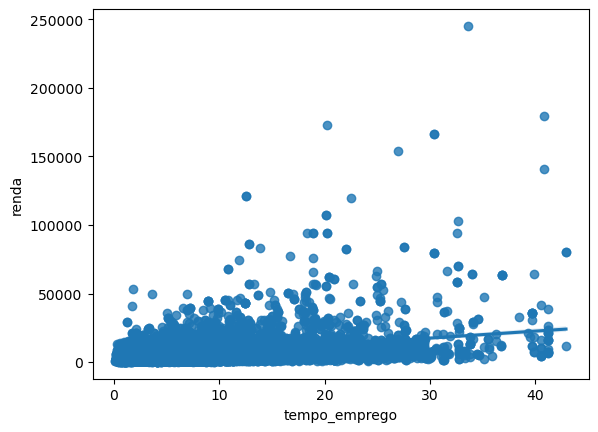

In [73]:
# 1)

sns.regplot(y='renda', x='tempo_emprego', data=prev_renda)

In [71]:
# 2)

reg = smf.ols('np.log(renda) ~ tempo_emprego + np.power(tempo_emprego,2)', prev_renda).fit()

prev_renda['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1312.
Date:                Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:17:32   Log-Likelihood:                -15125.
No. Observations:               12427   AIC:                         3.026e+04
Df Residuals:                   12424   BIC:                         3.028e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.7665      0.015    514.262      0.000       7.737       7.796
tempo_emprego                  0.0743      0.003     25.799      0.000       0.069       0.080
np.power(tempo_emprego, 2)    -0.0007   9.95e-05     -7.076      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       28.920   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.103
Skew:                           0.117   Prob(JB):                     4.79e-07
Kurtosis:                       2.961   Cond. No.                         460.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='tempo_emprego', ylabel='res_log'>

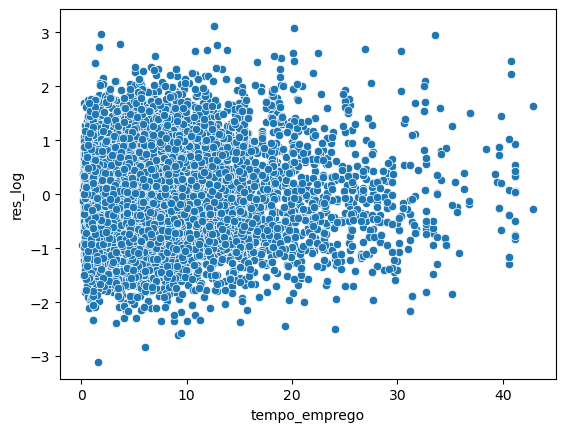

In [57]:
sns.scatterplot(y='res_log', x='tempo_emprego', data=prev_renda)

In [67]:
prev_renda['predict_y'] = np.exp(reg.fittedvalues)
r = prev_renda[['predict_y', 'renda']].corr()
r2 = r.iloc[0,1]**2
r2

0.15079600644875527

In [93]:
# 3)

reg = smf.ols('renda ~ data_ref + id_cliente + sexo + posse_de_veiculo + posse_de_imovel +	qtd_filhos + tipo_renda + educacao + estado_civil +	tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', prev_renda).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     109.8
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:08:16   Log-Likelihood:            -1.2878e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12387   BIC:                         2.579e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5759.2442   2520.039     -2.285      0.022   -1.07e+04    -819.575
data_ref[T.2015-02-01]             -51.9151    377.096     -0.138      0.891    -791.082     687.252
data_ref[T.2015-03-01]             222.9354    378.084      0.590      0.555    -518.168     964.039
data_ref[T.2015-04-01]             642.3659    376.953      1.704      0.088     -96.520    1381.252
data_ref[T.2015-05-01]             176.5809    375.914      0.470      0.639    -560.270     913.432
data_ref[T.2015-06-01]             642.6161    377.479      1.702      0.089     -97.302    1382.534
data_ref[T.2015-07-01]             366.5612    376.191      0.974      0.330    -370.831    1103.954
data_ref[T.2015-08-01]             207.0676    377.492      0.549      0.583    -532.875     947.010
data_ref[T.2015-09-01]             150.6806    374.958      0.402      0.688    -584.296     885.657
data_ref[T.2015-10-01]             272.5373    377.511      0.722      0.470    -467.442    1012.517
data_ref[T.2015-11-01]             444.1329    377.686      1.176      0.240    -296.190    1184.455
data_ref[T.2015-12-01]             624.4096    378.999      1.648      0.099    -118.488    1367.307
data_ref[T.2016-01-01]             302.4136    377.447      0.801      0.423    -437.441    1042.268
data_ref[T.2016-02-01]             -43.5417    377.367     -0.115      0.908    -783.239     696.155
data_ref[T.2016-03-01]              60.1761    380.722      0.158      0.874    -686.098     806.450
sexo[T.M]                         6056.3382    155.940     38.838      0.000    5750.672    6362.005
posse_de_veiculo[T.True]            42.9217    150.594      0.285      0.776    -252.267     338.110
posse_de_imovel[T.True]            352.5163    149.455      2.359      0.018      59.561     645.472
tipo_renda[T.Bolsista]           -1377.8362   2568.569     -0.536      0.592   -6412.631    3656.958
tipo_renda[T.Empresário]           828.6254    158.916      5.214      0.000     517.125    1140.126
tipo_renda[T.Pensionista]        -2632.1209   2569.530     -1.024      0.306   -7668.798    2404.557
tipo_renda[T.Servidor público]     138.3702    236.531      0.585      0.559    -325.267     602.007
educacao[T.Pós graduação]         1010.8977   1691.642      0.598      0.550   -2304.984    4326.780
educacao[T.Secundário]             560.1259    766.269      0.731      0.465    -941.881    2062.133
educacao[T.Superior completo]     1177.9727    769.202      1.531      0.126    -329.783    2685.729
educacao[T.Superior incompleto]    150.1649    828.061      0.181      0.856   -1472.963    1773.293
estado_civil[T.Separado]          1150.7179   1183.904      0.972      0.331   -1169.919    3471.354
estado_civil[T.Solteiro]           817.3819   1158.94

In [154]:
# 4)

reg = smf.ols('renda ~ sexo + posse_de_imovel + educacao + idade + tempo_emprego + qt_pessoas_residencia', prev_renda).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     470.0
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:32:56   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12417   BIC:                         2.577e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -3668.4611    852.975     -4.301      0.000   -5340.424   -1996.498
sexo[T.M]                        6052.9779    146.192     41.404      0.000    5766.419    6339.537
posse_de_imovel[T.True]           362.3074    145.737      2.486      0.013      76.641     647.974
educacao[T.Pós graduação]        1351.6886   1687.321      0.801      0.423   -1955.721    4659.099
educacao[T.Secundário]            681.4809    763.022      0.893      0.372    -814.160    2177.122
educacao[T.Superior completo]    1352.4278    765.546      1.767      0.077    -148.161    2853.016
educacao[T.Superior incompleto]   328.7093    824.548      0.399      0.690   -1287.533    1944.952
idade                              44.1501      8.199      5.385      0.000      28.078      60.222
tempo_emprego                     549.1922     10.902     50.377      0.000     527.823     570.561
qt_pessoas_residencia             170.1698     76.124      2.235      0.025      20.955     319.385
==============================================================================
Omnibus:                    17546.277   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9816799.084
Skew:                           8.106   Prob(JB):                         0.00
Kurtosis:                     139.734   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='sexo', ylabel='log_res'>

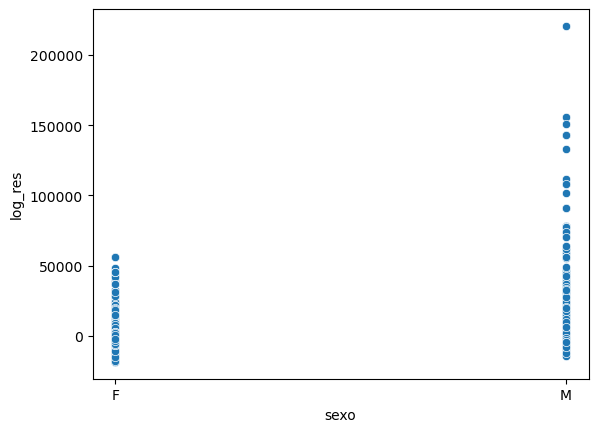

In [160]:
# 5)

prev_renda['log_res'] = reg.resid

sns.scatterplot(y='log_res', x='sexo', data=prev_renda)

<Axes: xlabel='posse_de_imovel', ylabel='log_res'>

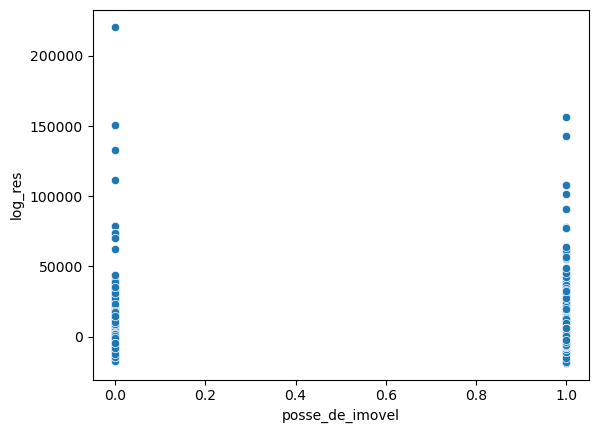

In [164]:
sns.scatterplot(y='log_res', x='posse_de_imovel', data=prev_renda)

<Axes: xlabel='educacao', ylabel='log_res'>

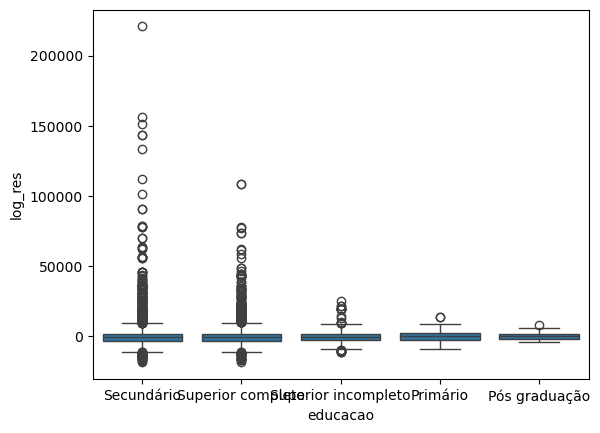

In [168]:
sns.boxplot(y='log_res', x='educacao', data=prev_renda)

<Axes: xlabel='idade', ylabel='log_res'>

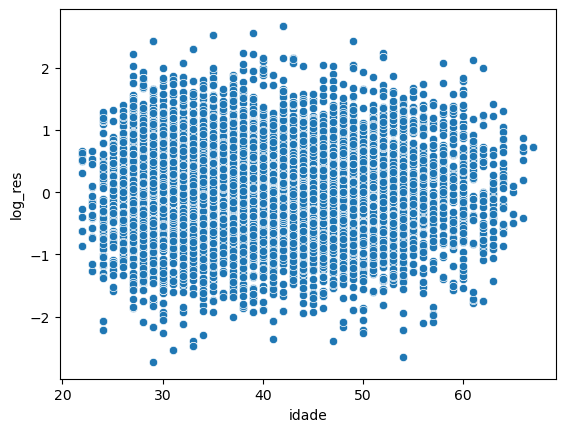

In [129]:
sns.scatterplot(y='log_res', x='idade', data=prev_renda)

<Axes: xlabel='tempo_emprego', ylabel='log_res'>

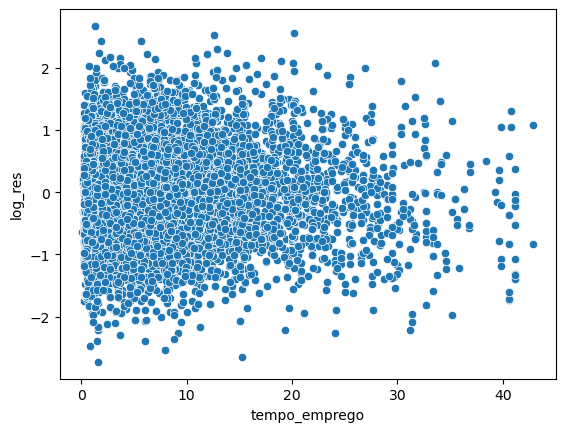

In [135]:
sns.scatterplot(y='log_res', x='tempo_emprego', data=prev_renda)

<Axes: xlabel='qt_pessoas_residencia', ylabel='log_res'>

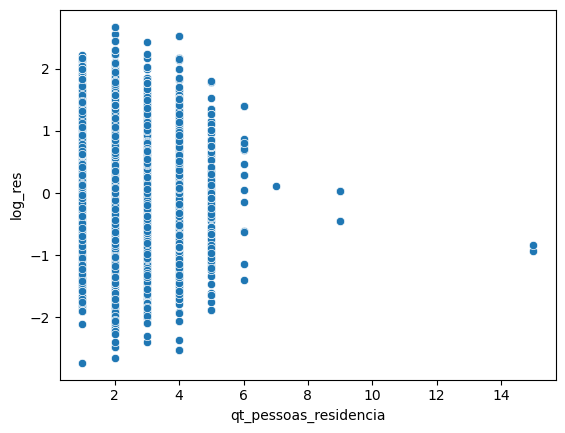

In [139]:
sns.scatterplot(y='log_res', x='qt_pessoas_residencia', data=prev_renda)

### Conclusão

As melhorias feitas no modelo, ajudaram a tornar mais explicativo.  
Depois de limpar o reg deixando só dados uteis a porcentagem explicativa aumentou consideravelmente.